In [247]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.linalg

def rand_gauss(n, mu, cov):
    if cov.ndim == 1:
        cov = np.diag(cov)
    assert(mu.ndim == 1 and len(mu) == len(cov) and cov.ndim == 2 and cov.shape[0] == cov.shape[1])
    d, v = np.linalg.eigh(cov)
    return (np.random.randn(n, len(mu)) * np.sqrt(d)).dot(v) + mu

def gellipse(mu, cov, *args, **kwargs):
    """
    Contour plot of 2D Multivariate Gaussian distribution showing
    2 times standard deviation range around the mean.

    gellipse(mu, cov, n) plots ellipse given by mean vector MU and
    covariance matrix COV. Ellipse is plotted using N (default is 100)
    points. Additional parameters can specify various line types and
    properties. See description of matplotlib.pyplot.plot for more details.
    """
    n= kwargs.get('npoints', 100) 
    if len(mu) != 2 or cov.shape != (2, 2):
        raise RuntimeError('mu must be a two element vector and cov must be 2 x 2 matrix')

    d, v = np.linalg.eigh(4 * cov)
    d = np.diag(d)
    t = np.linspace(0, 2 * np.pi, n)
    x = v @ np.sign(d) @ np.sqrt(np.abs(d)) @ np.array([np.cos(t), np.sin(t)]) + mu[:,None]
    return plt.plot(x[0], x[1], *args, **kwargs)



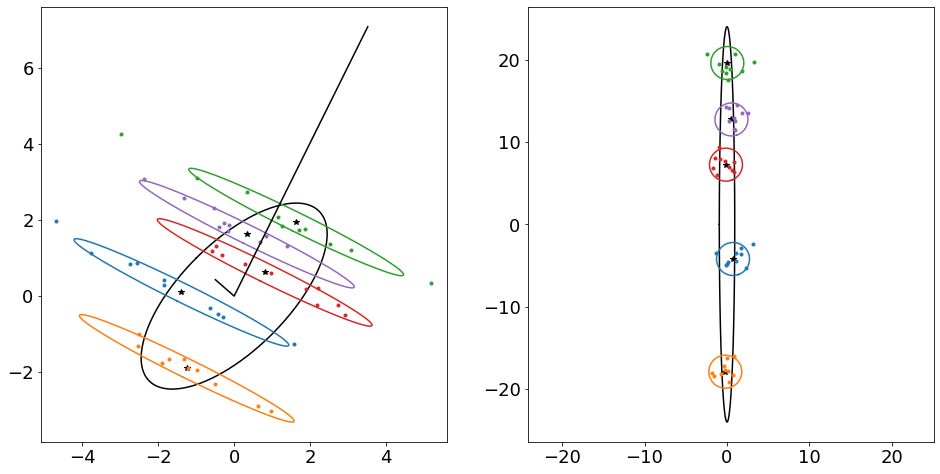

In [288]:
global_mean = np.array([0, 0]);
Sac = np.array([[1.50, 1.00],
                [1.00, 1.50]])
Swc = np.array([[ 2.00, -0.98],
                [-0.98,  0.50]])
              
means = rand_gauss(5, global_mean, Sac)
data = [rand_gauss(10, m, Swc) for m in  means]

def plot_trasformed_data(A):
    gellipse(global_mean, A.T@Sac@A, c='k')
    plt.plot(*(means@A).T, '*k')
    
    for m, x in zip(means, data):
        color = gellipse(m@A, A.T@Swc@A)[0].get_color()
        plt.plot(*(x@A).T, '.', c=color)
    plt.axis('equal')   

plt.rcParams.update({'figure.figsize': (16.0, 8.0), 'font.size': 18})
plt.subplot(121)
plot_trasformed_data(np.eye(2))
L, W = scipy.linalg.eigh(Sac, Swc)
plt.plot([W[0,0],0, W[0,1]], [W[1,0], 0, W[1,1]], 'k');

plt.subplot(122)
plot_trasformed_data(W)

[ 1.87295513 47.99544506]


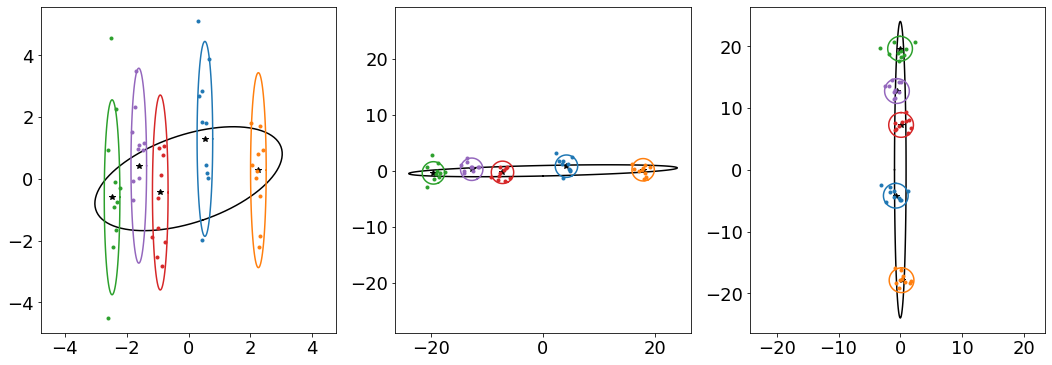

In [291]:
plt.rcParams.update({'figure.figsize': (18.0, 6.0), 'font.size': 18})
Lwc, Ewc = scipy.linalg.eigh(Swc)

A=Ewc

plt.subplot(131); plot_trasformed_data(A)

A=A/np.sqrt(Lwc)

plt.subplot(132); plot_trasformed_data(A)

Lac, Eac = scipy.linalg.eigh(A.T@Sac@A)
A = A@Eac

plt.subplot(133); plot_trasformed_data(A)

print(4*np.sqrt(Lac))